This script aims at extracting information from the DefenseWiki JSON file, and run basic statistics.
Indeed, for each page, we want to extract:
- the view_count: to measure the popularity of the page
- the word and line counts: to get an estimate on how much info is contained per page
- the number of links, functional or not: how well documented is the page #TODO
- the language: to get an overview of the represented language in the DefenseWiki

In [40]:
import json
import os
import pandas as pd
import importlib
import src.file_manager
importlib.reload(src.file_manager) # Reload the module
from src.file_manager import extract_info_from_defensewiki_and_create_dataframe
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
language_mapping = {
    "en": "English",
    "es": "Spanish",
    "fr": "French",
    "ru": "Russian",
    "ar": "Arabic",
    "zh-cn": "Chinese (Simplified)",
    "pt": "Portuguese",
    "ko": "Korean",
    "it": "Italian",
    "fa": "Persian (Farsi)",
    "vi": "Vietnamese",
}

### Load the data and extract info from the json file: language, view_count, and line + word count.

In [42]:
dir_plots = "../plots"
input_json_file = "../data/interim/defensewiki1_no_content.json"

with open(
        input_json_file,
    "r",
) as f:
    link_tree_defensewiki = json.load(f)

summary_defensewiki = extract_info_from_defensewiki_and_create_dataframe(link_tree_defensewiki)
summary_defensewiki.reset_index()
summary_defensewiki.to_csv(
    "../data/interim/summary_defensewiki.csv",
    index=False,
)
print(summary_defensewiki.shape)


(1252, 4)


In [43]:
summary_defensewiki

,Language,nbr_of_words,nbr_of_lines,Viewcount
Title,,,,
Criminal_Justice_Systems_Around_the_World,en,1096,309,NaN
Singapore,en,14501,896,382187.0
Representing_Victims_of_Torture,en,6779,389,407014.0
India_Criminal_Defense_Manual_-_Various_Defense_Strategies,en,20447,724,394733.0
Burundi,en,3378,273,232258.0
...,...,...,...,...
Paraguay,en,359,82,2133.0
Malasia,es,1035,131,NaN
"American_Bar_Association_Model_Rules_of_Professional_Conduct_-_Rule_1.12._Former_Judge,_Arbitrator,_Mediator_or_Other_Third-Party_Neutral",en,602,93,3021.0


### Sort languages by decreasing count

In [44]:
# summary_defensewiki = pd.read_csv("../data/interim/summary_defensewiki.csv")
summary_defensewiki["Language"].value_counts()
language_counts = summary_defensewiki["Language"].value_counts().reset_index()
language_counts.columns = ["Language", "Count"]
language_counts

,Language,Count
0,en,925
1,es,163
2,fr,115
3,ru,24
4,ar,10
5,zh-cn,7
6,pt,4
7,ko,1
8,it,1
9,fa,1


Plot the language counts

/var/folders/j5/fs67kx2s4nbg0rkzqjzf2w_80000gn/T/ipykernel_32639/1903682805.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


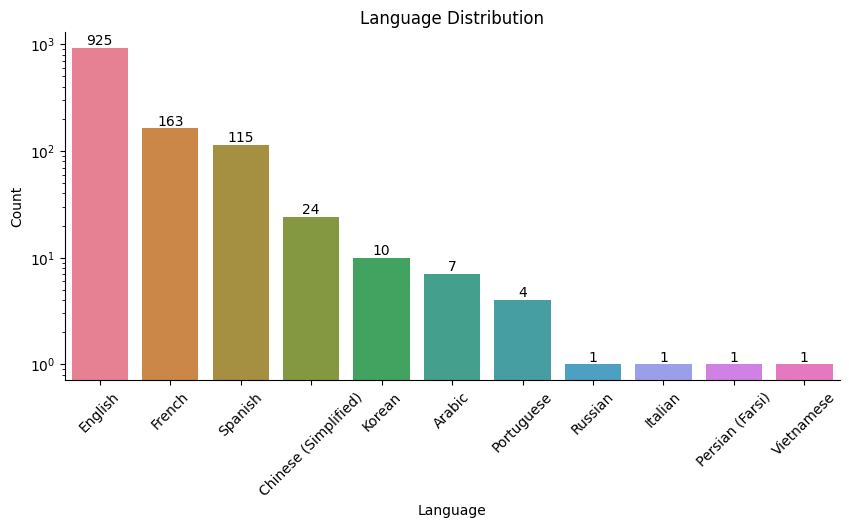

In [36]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", n_colors=11)  # len(language_counts['Language'])
ax = sns.barplot(
    x="Language",
    y="Count",
    data=language_counts,
    palette=palette,
    order=language_counts["Language"],
    hue="Language",
)

for i, count in enumerate(language_counts["Count"]):
    ax.annotate(
        format(count, ","),  # Format count with commas
        (i, count),  # Use index position for x-axis
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
ax.set_xticklabels(
    [language_mapping.get(lang, lang) for lang in summary_defensewiki["Language"].unique()],
    rotation=45,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.3)
plt.yscale("log")
plt.savefig(os.path.join(dir_plots, "plot_defensewiki_Languages.png"), dpi=300)
plt.show()

### Plot Viewcount 

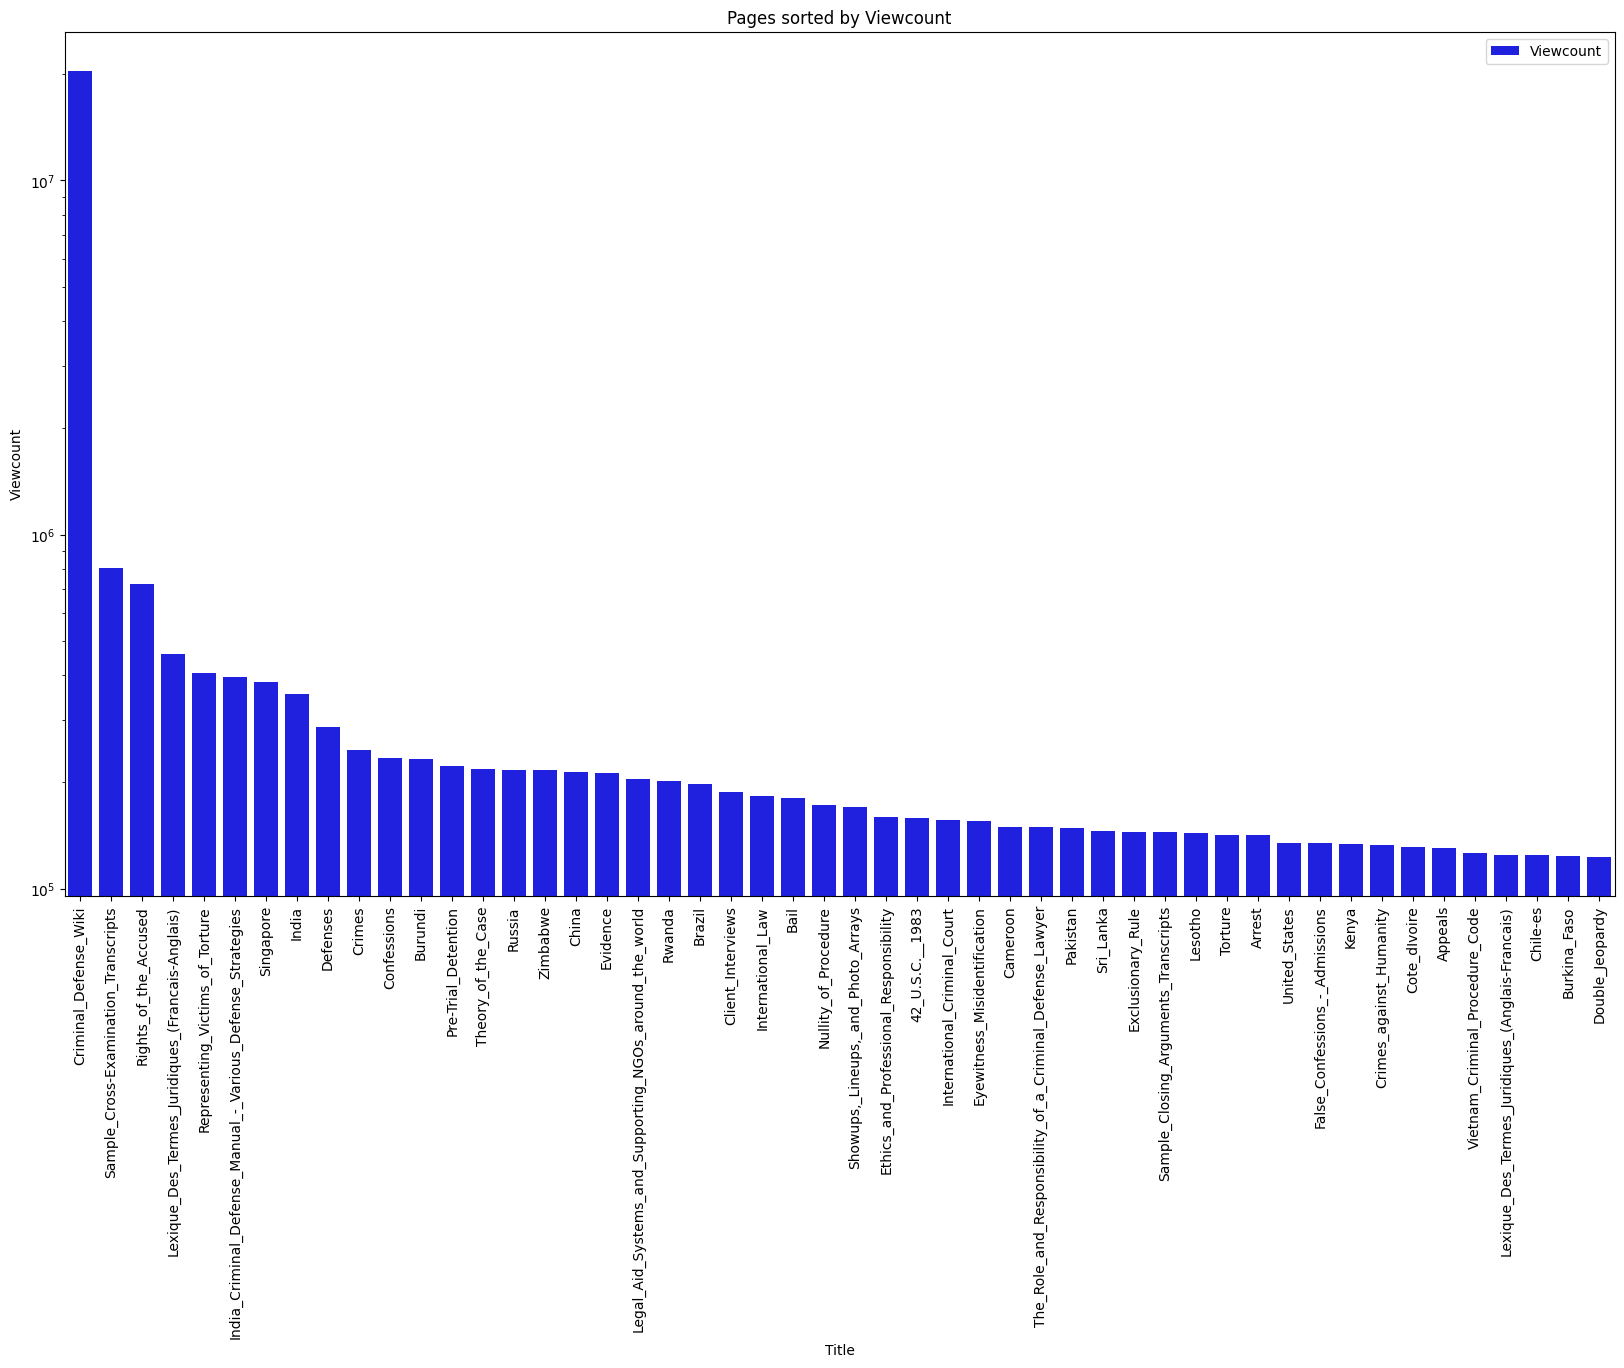

In [37]:
summary_defensewiki_sorted = summary_defensewiki.sort_values(
    by="Viewcount", ascending=False
).head(50)
plt.figure(figsize=(20, 18))
palette = sns.color_palette("husl", n_colors=30)
sns.barplot(
    y="Viewcount",
    x="Title",
    data=summary_defensewiki_sorted,
    label="Viewcount",
    color="b",
)
plt.subplots_adjust(bottom=0.4)
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Pages sorted by Viewcount")
plt.savefig(os.path.join(dir_plots, "plot_defensewiki_Viewcounts.png"), dpi=300)
plt.show()

### Plot nbr_of_lines

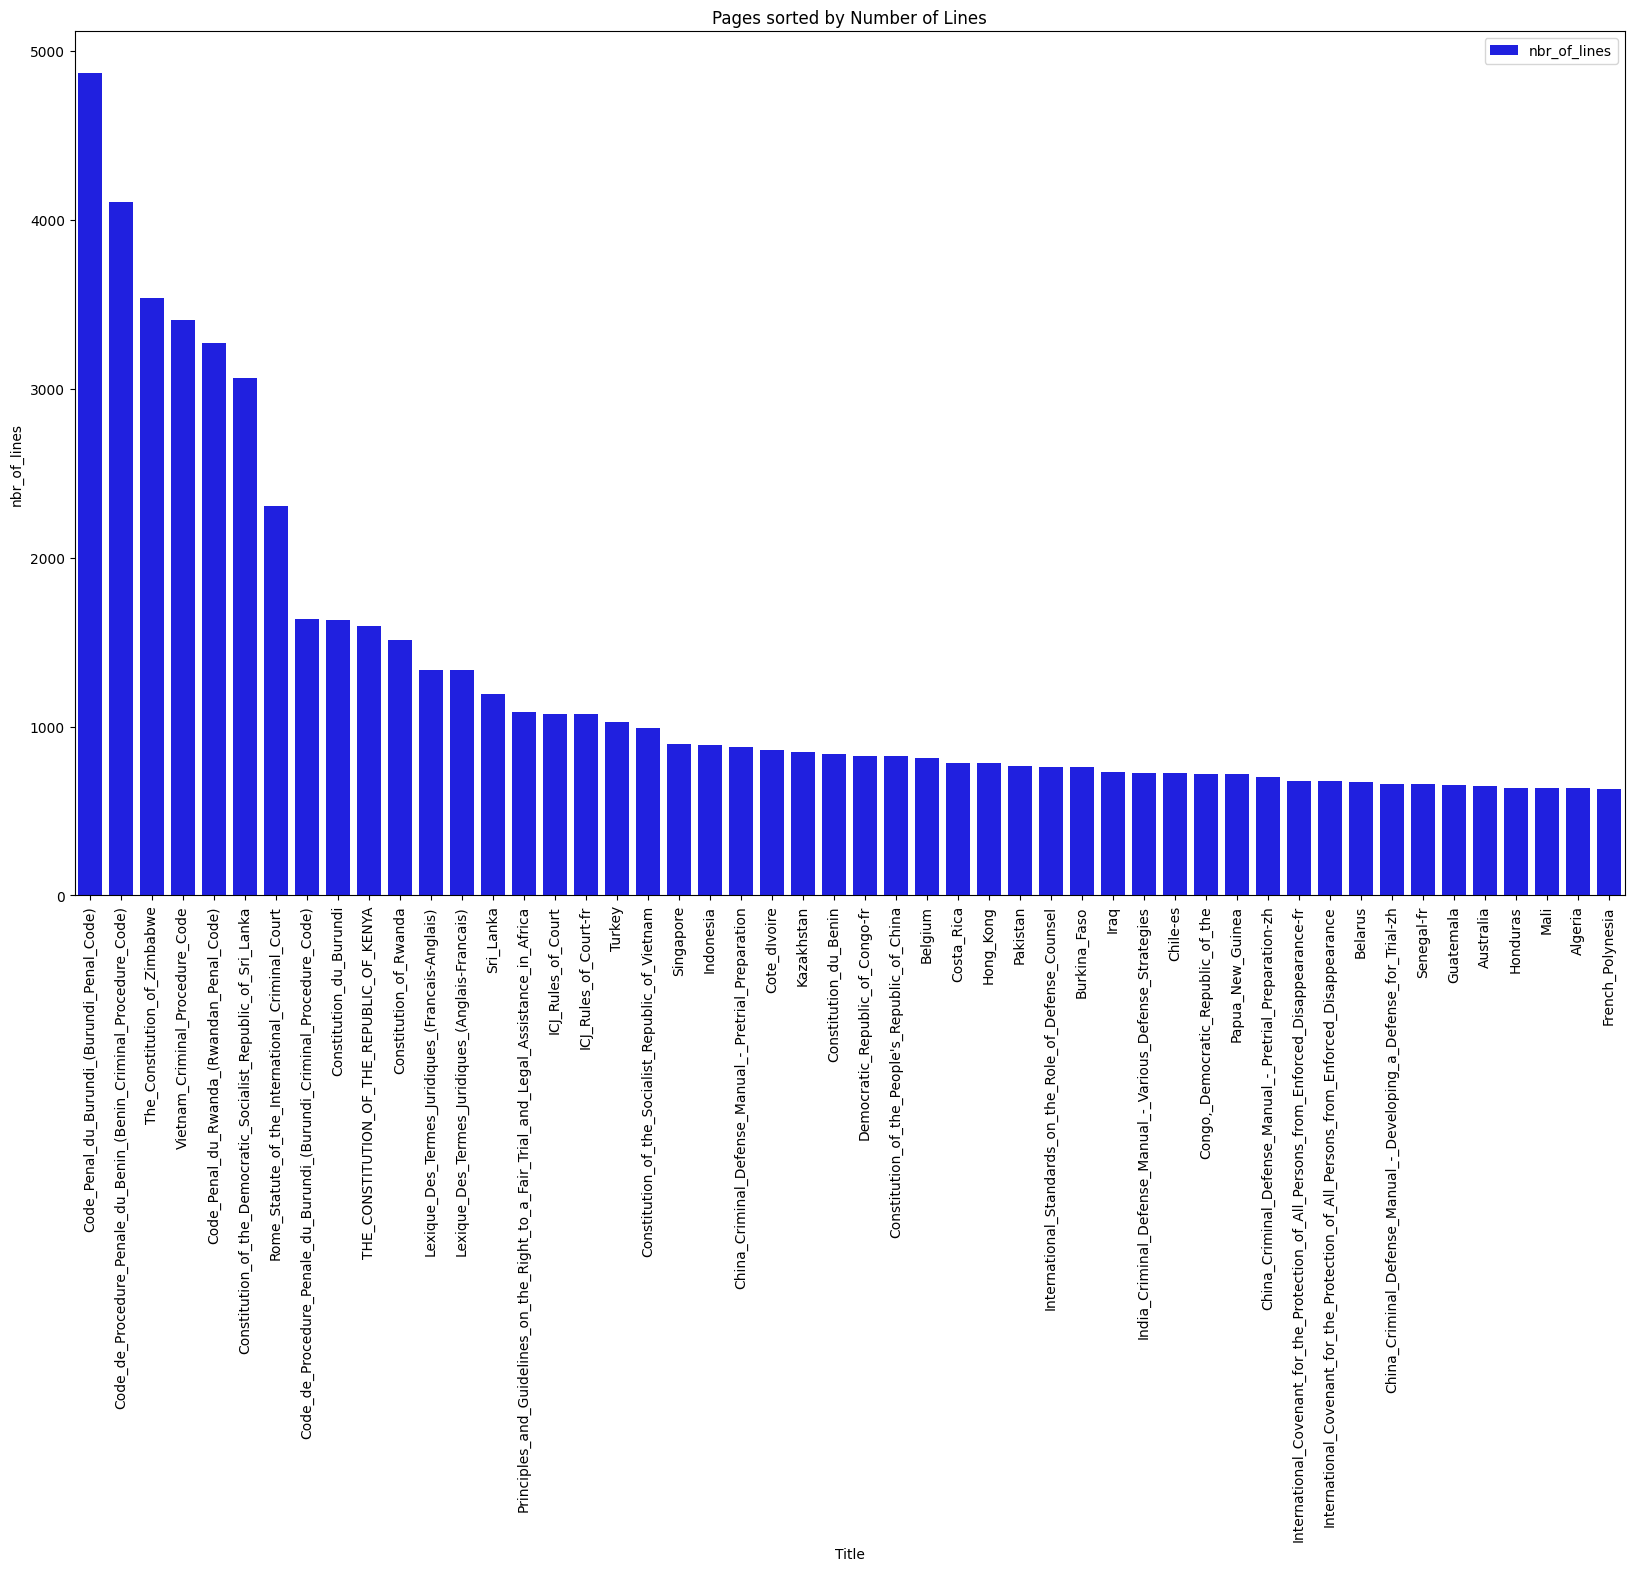

In [45]:
summary_defensewiki_sorted_lines = summary_defensewiki.sort_values(
    by="nbr_of_lines", ascending=False
).head(50)
plt.figure(figsize=(20, 18))
palette = sns.color_palette("husl", n_colors=30)
sns.barplot(
    y="nbr_of_lines",
    x="Title",
    data=summary_defensewiki_sorted_lines,
    label="nbr_of_lines",
    color="b",
)
plt.subplots_adjust(bottom=0.4)
plt.xticks(rotation=90)
plt.title("Pages sorted by Number of Lines")
plt.savefig(os.path.join(dir_plots, "plot_defensewiki_nbr_of_lines.png"), dpi=300)
plt.show()


In [46]:
summary_defensewiki_sorted_lines

,Language,nbr_of_words,nbr_of_lines,Viewcount
Title,,,,
Code_Penal_du_Burundi_(Burundi_Penal_Code),fr,50530,4871,20582.0
Code_de_Procedure_Penale_du_Benin_(Benin_Criminal_Procedure_Code),fr,78682,4104,NaN
The_Constitution_of_Zimbabwe,en,41982,3536,22801.0
Vietnam_Criminal_Procedure_Code,en,47448,3404,125966.0
Code_Penal_du_Rwanda_(Rwandan_Penal_Code),fr,35935,3271,11997.0
Constitution_of_the_Democratic_Socialist_Republic_of_Sri_Lanka,en,47632,3065,17233.0
Rome_Statute_of_the_International_Criminal_Court,en,32441,2305,63938.0
Code_de_Procedure_Penale_du_Burundi_(Burundi_Criminal_Procedure_Code),fr,16981,1638,NaN
Constitution_du_Burundi,fr,16978,1628,35029.0
